In [28]:
%matplotlib inline
from IPython.display import display, Math, Latex

import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

url = 'https://docs.gimp.org/2.8/en/images/filters/examples/taj_orig.jpg'
response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert('L')

Text(0.5, 1.0, 'Original image')

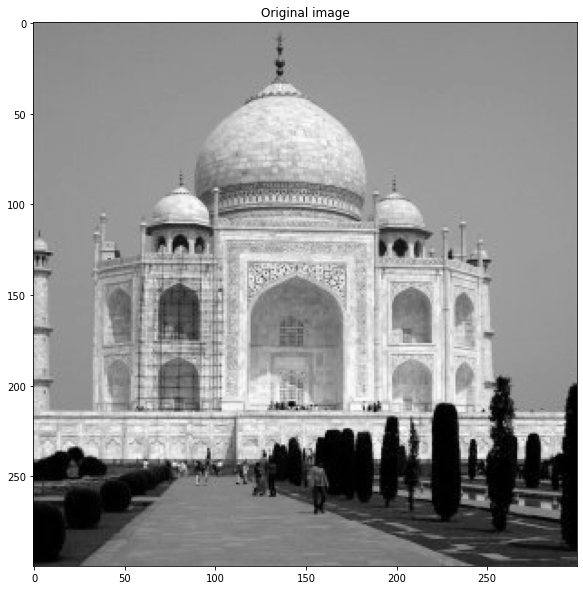

In [29]:
# display the image
figsize = (10,10)
plt.figure(figsize=figsize)

plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title("Original image")

(array([ 4510.,  1143.,   674.,   499.,   392.,   365.,   336.,   513.,
          903.,  1207.,  1080.,   568.,   484.,   440.,   400.,   407.,
          386.,   410.,   459.,   506.,   681.,   839.,  1111.,  1654.,
         2785.,  3073.,  2016.,  3835., 11227., 12699., 10291.,  1398.,
         1194.,  1298.,  1326.,  1366.,  1416.,  1492.,  1562.,  1644.,
         2099.,  1871.,  1756.,  1565.,  1442.,  1136.,   765.,   475.,
          245.,    57.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <a list of 50 Patch objects>)

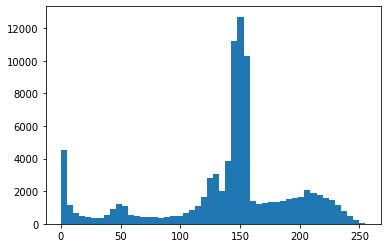

In [30]:
# convert our image into a numpy array
img = np.asarray(img)
# put pixels in a 1D array by flattening out img array
flat = img.flatten()
# show the histogram
plt.hist(flat, bins=50)

In [31]:
# create our own histogram function
def get_histogram(image, bins):
    # array with size of bins, set to zeros
    histogram = np.zeros(bins)
    
    # loop through pixels and sum up counts of pixels
    for pixel in image:
        histogram[pixel] += 1
    
    # return our final result
    return histogram

# execute our histogram function
hist = get_histogram(flat, 256)

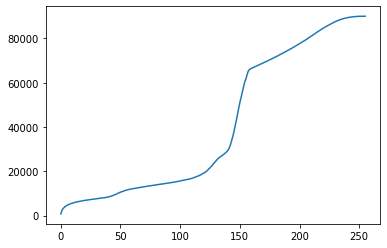

In [32]:
# create our cumulative sum function
def cumsum(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)

# execute the fn
cs = cumsum(hist)

# display the result
plt.plot(cs)

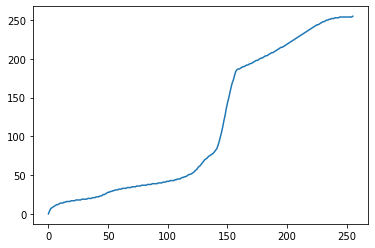

In [33]:
# numerator & denomenator
nj = (cs - cs.min()) * 255
N = cs.max() - cs.min()

# re-normalize the cumsum
cs = nj / N

# cast it back to uint8 since we can't use floating point values in images
cs = cs.astype('uint8')

plt.plot(cs)

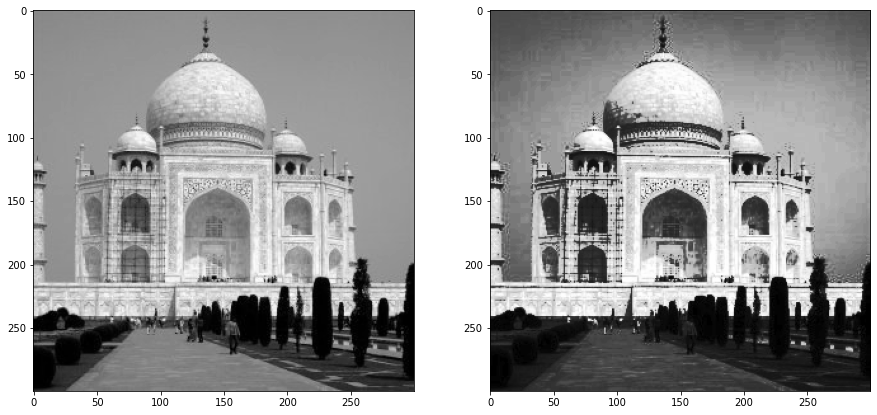

In [34]:
# get the value from cumulative sum for every index in flat, and set that as img_new
img_new = cs[flat]

# put array back into original shape since we flattened it
img_new = np.reshape(img_new, img.shape)

# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(img, cmap='gray')

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(img_new, cmap='gray')

plt.show(block=True)

(array([2364., 2146., 1695., 1792., 1788., 1703., 1776., 1805., 1751.,
        1493., 2170., 1652., 1945., 1745., 1603., 1380., 1561., 1307.,
        1876., 1958., 2163., 2557.,    0., 2673., 2521.,    0., 2979.,
           0., 2524., 2243., 2432., 2238.,    0., 3780.,    0., 1833.,
        3337., 1695., 1822., 1589., 2278., 1509., 1910., 1672., 1773.,
        1883., 1723., 1829., 1562., 1965.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <a list of 50 Patch objects>)

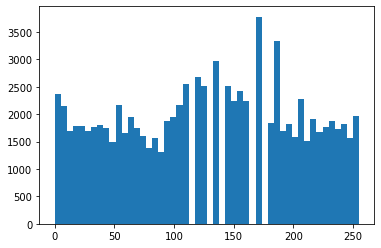

In [35]:
# convert our image into a numpy array
img = np.asarray(img_new)
# put pixels in a 1D array by flattening out img array
flat = img_new.flatten()
# show the histogram
plt.hist(flat, bins=50)